# INTRODUCTION

In this guided project, we'll work with exit surveys from employees of Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In this project, we will be proffering answers to the following questions: 

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?  What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


Below is a preview of a couple of some columns we'll work with from the dete_survey.csv

- ID - An id used to identify the participant of the survey

- SeperationType - The reason why the person's employment ended

- Cease Date - The year or month the person's employment ended

- DETE start date - The year the person began employment with the DETE


Below is a preview of a couple of columns we'll work with from the tafe_survey.csv

- Record ID - An id to identify the participant of the survey

- Reason for ceasing employment - The reason why the person's employment ended

- LengthofServiceOverall - The length of the person's employment in years


We will be cleaning the data, dropping columns not neccessary for our analysis and then combining both data for the analysis. 

In [1]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the csv files into our environment using pandas
dete_survey = pd.read_csv("C:\\Users\\USER\\Videos\\Coding Videos\\my_datasets\\dete_survey.csv")

tafe_survey = pd.read_csv("C:\\Users\\USER\\Videos\\Coding Videos\\my_datasets\\tafe_survey.csv")


# EXPLORATION

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [7]:
#Identify the columns with null values
dete_survey.isnull().sum()
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

From the various exploration done on both datasets, we can observe that there are quite a number of missing of rows in both datasets.. Also the column names of our both datasets aren't consistent. 

In the dete_survey dataset, some values contains the word "Not Stated" that indicates the values are missing.

We will look for a way to specify dataframe with "Not Stated" as "NAN". And after then drop columns we don't need.

In [8]:
#Read the dete_survey csv file into pandas again and set the nan values to Not stated, to change all
#occurences of not stated to NaN
dete_survey = pd.read_csv("C:\\Users\\USER\\Videos\\Coding Videos\\my_datasets\\dete_survey.csv", na_values = "Not Stated")

# DROPPING UNNECCESSARY COLUMNS

In [9]:
#Dropping columns not useful/needed in analysis
dete_survey= dete_survey.drop(dete_survey.columns[28:49], axis = 1)

tafe_survey= tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

From both datasets, we have decided to drop some columns that are of little or to relevance to our analysis. Considering the dete dataset, we drop columns from 28 to 48 which contains *Proffessional development* to *Health and Safety columns* because these columns has direct connection with the institute and not with the employee as a person.

For the tafe_survey dataset,we drops columns 17 to 65 for same reason as the first and also because of their little or no importance to the analysis at hand.

#  CLEAN COLUMN NAMES

For easy data combination and also elimination of missing values during data transformation, it is pertinent that column names are cleaned. Each dataframe contains columns with different names but carrying same data.

For eaxample 

- Id and Record Id

- Gender and What is your gender

- Age and Current Age

- SeperationType and Reason for ceasing employment and more

Hence, we will rename these columns so that for both dataframes, columns with different name but having contents the same are made to bear same column name.

In [10]:
#Inspect column names to identify patterns before proceeding to cleaning
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [11]:
#Clean column names using vectorised string methods by replacing unwanted characters
#removing trailing white spaces and all
columns = dete_survey.columns.str.strip().str.replace(" ", "_").str.replace("/","_").str.replace(".", " ").str.lower()
#Assing clean names back to column using the "columns" attribute
dete_survey.columns = columns

In [12]:
#Rename the tafe dataset using the rename method
mapping = {
    "Record ID":"id",
    "CESSATION YEAR":"cease_date",
    "Reason for ceasing employment": "separationtype",
    "Gender. What is your Gender?": "gender",
    "CurrentAge. Current Age" :"age",
    "Employment Type. Employment Type": "employment_status",
    "Classification.Classification": "position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
    "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"
}
tafe_survey.rename(mapping,inplace = True, axis =1)

### EXPLORE DATAFRAME TO SEE IF CHANGES EFFECTED

In [13]:
dete_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,Classification. Classification,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# SHORT NARRATIVE OF PROCESS DONE THUS FAR

After reading our files into the enviroment, we explored the data for both dataframes, to see how both datas are. We made quite a few observations and apprpopriate corrections:

- The DETE dataframe has some null values stipulated as *Not Stated*, we changed them to *NAN* using the na_values parameter of the read_csv function

- Column names are not consistent for both dataframes

- Some columns are not important for the needed analysis, hence, dropping them poses no danger.

Although we left some unaltered, but we will go back to them. We discovered that some columns in both datasets have same meaning but different names. Hence, we cleaned them to make sure both names are the same in preparation for combination.

# MORE CLEANING PROCESS

If we consider the question we intend answering by carrying out the analysis: *Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?* We are only interested in separation from institute as a result of resignation and nothing else. 

If we explore the unique values of the separation column in both datasets, we will see some other reasons for separation apart from resignation. Since, our question requires us to proffer solution to resignation, we will have to select only rows associated with resignation.

In [15]:
#Unique values for seperation column in tafe survey
tafe_survey["separationtype"].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [16]:
#Unique values for separation column in dete survey
dete_survey.separationtype.unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

A closer look at the dete_survey dataframe, we see that it contains multiple separation type with string "Resignation". Lets observe it more closely.

In [17]:
tafe_survey.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
dete_survey.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

From the value_counts exploration, it is evident that the dete_survey dataset has strings containing Resignation for different reasons.

We will filter only data/rows containing the "Resignation" string from the separationtype column as a copy from our main datasets.

# FILTER THE DATA

In [19]:
#Filter the rows containing string "Resignation" from both datasets.
tafe_survey_resignations=tafe_survey[tafe_survey.separationtype=="Resignation"].copy()

dete_survey_resignations = dete_survey[dete_survey.separationtype.str.contains("Resignation")].copy()

In [20]:
#Explore new copy dataframe for tafe-survey
tafe_survey_resignations.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,Classification. Classification,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [21]:
#Explore dete dataframe
dete_survey_resignations.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


# VERIFY DATA FOR DATE COLUMNS

Next, we will consider/focus on verifying the years in "cease_date" and "dete_start_date" as it couldn't make sense to have a cease date later than the start date or the start date earlier than the cease date. Since both datasets have cease_date columns, it will make more sense to make them both uniform.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis as it will end up producing bad results.

All NaN values will be removed and only year is maintained rather than month and date.

In [22]:
#Explore cease_date column
dete_survey_resignations.cease_date.value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In a bid to make our data consistent and clean, we will modify the cease date data in the dete_survey dataset by using the vectorised string method to extract just the year from the string.

In [23]:
#Vectorised string method toclean and extract only year
dete_survey_resignations["cease_date"] = dete_survey_resignations.cease_date.str.split("/").str[1].astype(float)

In [24]:
#Check values for cease date in both data

print(dete_survey_resignations.cease_date.value_counts())
print("\n")
print(tafe_survey_resignations.cease_date.value_counts())

2013.0    72
2014.0    22
2012.0     3
2006.0     1
2010.0     1
Name: cease_date, dtype: int64


2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [25]:
dete_survey_resignations.cease_date.sort_index(ascending = False)

821    2013.0
819    2014.0
816    2014.0
815    2014.0
808    2013.0
        ...  
11        NaN
9         NaN
8      2012.0
5      2012.0
3      2012.0
Name: cease_date, Length: 311, dtype: float64

The cease date and start dates both give the period the employee left the company and the period he/she commenced work there respectively. The assumption made is that the start date shouldn't be greater than the current date and the start date shouldn't be previous to 1970 given that people are usually employed in their 20's.

Future dates are obviously out of question and for dates previous to 1970 means that given the person was employed in 20's the current age of the person would be 70+, which is almost over retirement age. Hence, lower limit has to be set to 1970. We will use the box plot to check and catch outliers.

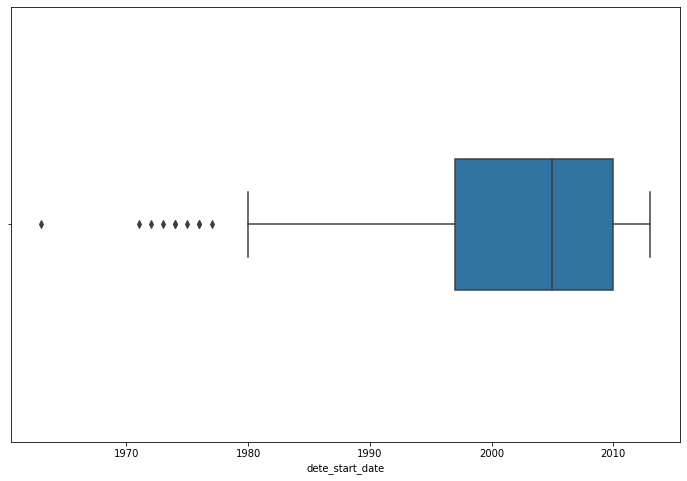

In [26]:
#Plot using seaborn library
plt.figure(figsize = (12,8))
sns.boxplot(x = dete_survey_resignations.dete_start_date, width = 0.3)

The boxplot distribution above shows that there are outliers. Since we have decided that our lower bound value be 1970 as the lowest start year for all employee. Hence, we will have to remove the outlier. I have  decided to place my lower bound value for the start date as 1980. Hence, i will consider all years before 1980 as outliers.

In [27]:
#Remove outlier from the dete_start_date column using the between function
dete_survey_resignations = dete_survey_resignations[dete_survey_resignations["dete_start_date"].between(1980,2014, inclusive  = True)]

# CREATE NEW COLUMN

We notice that the tafe_survey dataframe contains a "service" column which we renamed to "institute_service. In order to analyze both dataframes, we will create a corresponding institute_service column in our dete_survey_resignation dataframe.This institute_service refersn to the number of years the employee spent in active service.

To create this in the dete_survey_resignations dataframe, we have to subtract the start_date from the cease_date. This will give us the years the employee spent working in the institute.

In [28]:
#Subtract cease_date from start_date, make values absolute using the abs function
dete_survey_resignations["institute_service"]= abs(dete_survey_resignations["dete_start_date"]-dete_survey_resignations["cease_date"])

In [29]:
#Explore dete_survey
dete_survey_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,NaN,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,NaN,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,809,Resignation-Other reasons,2013.0,2004.0,2004.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,9.0
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0


In [30]:
#Explore tafe_survey
tafe_survey_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,Classification. Classification,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


# IDENTIFY DISSATISFIED EMPLOYEES

Our interest lies in employees that resigned as a result of dissatifaction. To identify those columns carrying details/information of employees that resigned because of dissatisfaction, we will first get the info of our dataframes.

In [31]:
dete_survey_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 3 to 819
Data columns (total 36 columns):
id                                     273 non-null int64
separationtype                         273 non-null object
cease_date                             92 non-null float64
dete_start_date                        273 non-null float64
role_start_date                        260 non-null float64
position                               271 non-null object
classification                         144 non-null object
region                                 234 non-null object
business_unit                          28 non-null object
employment_status                      273 non-null object
career_move_to_public_sector           273 non-null bool
career_move_to_private_sector          273 non-null bool
interpersonal_conflicts                273 non-null bool
job_dissatisfaction                    273 non-null bool
dissatisfaction_with_the_department    273 non-null bool
physical_work_enviro

In [32]:
tafe_survey_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

Below are some columns from each dataframes that corresponds to dissatisfaction of employees.

For the tafe_survey_resignations :

- Contributing Factors: Dissatisfaction

- Contributing Factors: Job Dissatisfaction

For the dete_survey_resignations:

- dissatisfaction with department

- job dissatisfaction

- work life balance

- work load

- physical work environment

- lack of recognition

- lack of job security

- employment conditions

- work location

These are the reasons(according to our data) that made employees to resign from both firms. And we attribute these reason to dissatisfaction. 

If the employee indicated any of the factors above caused them to resign, we'll mark them as *dissatisfied* in a new column. We will create the new column using the any method. 

In [33]:
tafe_survey_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_survey_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

The two columns corresponding to dissatifaction in our tafe_survey dataframes has been identified. Now, we will create a function that does the following:

- If value is NaN return np.nan

- If value is "_" return False. Since there are already missing values, it wouldn't make sense to decalre "_" as missing values.

- For other values, return True

In [35]:
#Create a function update_vals 
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val =="-":
        return False
    else:
        return True
    
cols = ["Contributing Factors. Dissatisfaction",
        "Contributing Factors. Job Dissatisfaction"]
    
tafe_survey_resignations["dissatisfied"]=tafe_survey_resignations[cols].applymap(update_vals).any(axis = 1, skipna = False)
tafe_resignations_up = tafe_survey_resignations.copy()

In [36]:
tafe_resignations_up.dissatisfied.value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

The dete_survey dataframe already has the bool type for the various columns we are interested in. Hence, we will just update the True, False and NaN values in the newly created column accordingly, no need to apply the function.

In [37]:
cols = ["job_dissatisfaction",
       "dissatisfaction_with_the_department",
       "physical_work_environment",
       "lack_of_recognition",
       "work_location",
       "employment_conditions",
       "work_life_balance",
       "workload"]

dete_survey_resignations[cols]
dete_survey_resignations["dissatisfied"] = dete_survey_resignations[cols].any(axis = 1, skipna = False)
dete_resignations_up = dete_survey_resignations.copy()

In [38]:
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    146
True     127
Name: dissatisfied, dtype: int64

We have successfully done quite a number of cleaning, recall that our end goal to determine the reasons why employees resigned both those that worked long term and those that worked short term. Now, we will combine our datasets so that we can aggregate according to institute columns.

# COMBINE DATA

Before we combine the dataframes, we will create a new column that helps us distinguish each dtaframes

In [39]:
#Add columns to distinguish each dataframes
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [40]:
#Combine data using the concatenate function, set ignore index parameter to True
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined

C:\Users\USER\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Classification. Classification,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,...,role_service,role_start_date,separationtype,south_sea,study_travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Operational (OO),Career Move - Private Sector,-,-,-,-,-,-,-,-,...,5-6,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,Teacher (including LVT),-,Career Move - Public Sector,-,-,-,-,-,-,-,...,1-2,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,-,Career Move - Public Sector,-,-,-,-,-,-,-,...,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,Teacher (including LVT),-,-,-,-,-,-,-,-,-,...,1-2,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Explore combined data
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 54 columns):
Classification. Classification                         290 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null ob

In [42]:
#Use the thresh parameter in the dropna fucntion to drop columns with less than 500 non null values
combined_updated= combined.dropna(thresh = 500, axis = 1)
#Copy the institute_sevice column to our new dataframe. Since it was dropped alongside using the thresh, but we need it for our analysis
combined_updated["institute_service"]=combined["institute_service"].copy()

C:\Users\USER\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 8 columns):
age                  561 non-null object
dissatisfied         605 non-null object
employment_status    563 non-null object
gender               560 non-null object
id                   613 non-null float64
institute            613 non-null object
separationtype       613 non-null object
institute_service    382 non-null object
dtypes: float64(1), object(7)
memory usage: 38.4+ KB


In [44]:
combined_updated.head()

,age,dissatisfied,employment_status,gender,id,institute,separationtype,institute_service
0,36-40,False,Permanent Full-time,Female,4.0,DETE,Resignation-Other reasons,7
1,41-45,True,Permanent Full-time,Female,6.0,DETE,Resignation-Other reasons,18
2,31-35,False,Permanent Full-time,Female,9.0,DETE,Resignation-Other reasons,3
3,46-50,True,Permanent Part-time,Female,10.0,DETE,Resignation-Other employer,NaN
4,31-35,False,Permanent Full-time,Male,12.0,DETE,Resignation-Move overseas/interstate,NaN


# MORE DATA CLEANING

Recall that one of our question has to do with the time frames. That is those that has worked longer or shorter periods the reasons for their resignation. Hence, we will need the institute_service column for our analysis.

In [45]:
combined_updated.institute_service.value_counts(dropna = False).head(20)

NaN                   231
Less than 1 year       73
1-2                    64
3-4                    63
5-6                    33
11-20                  26
7-10                   21
3.0                    10
More than 20 years     10
9.0                     9
0.0                     7
2.0                     7
1.0                     5
7.0                     4
6.0                     4
5.0                     4
15.0                    4
8.0                     3
10.0                    3
4.0                     3
Name: institute_service, dtype: int64

This column is a bit tricky to clean, because it contains data in different formats. To analyze this column, we will convert these numbers into categories.

We will use the slightly modified definitions below to categorise our data; These definition is derived from an article on business wire.com.

- New: Less than 3 years at a company

- Experienced: 3-6 years at a company

- Established: 7-10 years at a company

- Veteran: 11 or more years at a company

But first, we will extract the digits from the column using regex method

In [46]:
combined_updated_copy = combined_updated.copy()
combined_updated_copy["institute_service"]=combined_updated["institute_service"].astype(str).str.extract(r"(\d+)").astype(float)

In [47]:
 combined_updated_copy.institute_service.value_counts()

1.0     142
3.0      73
5.0      37
11.0     27
7.0      25
20.0     12
9.0       9
2.0       7
0.0       7
6.0       4
15.0      4
10.0      3
8.0       3
17.0      3
4.0       3
25.0      2
13.0      2
22.0      2
18.0      2
12.0      2
14.0      2
34.0      1
16.0      1
23.0      1
30.0      1
29.0      1
24.0      1
19.0      1
27.0      1
28.0      1
21.0      1
31.0      1
Name: institute_service, dtype: int64

Now, we will define a funtion that splits the values in the institute_service column into the categories we defined above.

In [48]:
def mapvalues(val):
    if (val<3):
        return "New"
    elif(val>=3) & (val<= 6):
        return "Experienced"
    elif (val>=7) & (val<=10):
        return "Established"
    elif val >= 11:
        return "Veteran"
    elif pd.isnull(val):
        return "Unknown"
#Create a new column to contain the categories    
combined_updated_copy["service_cat"]= combined_updated_copy["institute_service"].apply(mapvalues)
        

In [49]:
combined_updated_copy

,age,dissatisfied,employment_status,gender,id,institute,separationtype,institute_service,service_cat
0,36-40,False,Permanent Full-time,Female,4.000000e+00,DETE,Resignation-Other reasons,7.0,Established
1,41-45,True,Permanent Full-time,Female,6.000000e+00,DETE,Resignation-Other reasons,18.0,Veteran
2,31-35,False,Permanent Full-time,Female,9.000000e+00,DETE,Resignation-Other reasons,3.0,Experienced
3,46-50,True,Permanent Part-time,Female,1.000000e+01,DETE,Resignation-Other employer,NaN,Unknown
4,31-35,False,Permanent Full-time,Male,1.200000e+01,DETE,Resignation-Move overseas/interstate,NaN,Unknown
...,...,...,...,...,...,...,...,...,...
608,21 25,False,Temporary Full-time,Male,6.350660e+17,TAFE,Resignation,5.0,Experienced
609,51-55,False,Temporary Full-time,Male,6.350668e+17,TAFE,Resignation,1.0,New
610,NaN,False,NaN,NaN,6.350677e+17,TAFE,Resignation,NaN,Unknown
611,51-55,False,Permanent Full-time,Female,6.350704e+17,TAFE,Resignation,5.0,Experienced


# DATA ANALYSIS

Now we are a few steps closer to answering the questions. First, lets explore our dissatified column, to see the values in it.

In [50]:
combined_updated_copy["dissatisfied"].value_counts(dropna = False)

False    387
True     218
NaN        8
Name: dissatisfied, dtype: int64

We have 8 NAN values that we will fill with False, since it is the most frequent.

In [51]:
#Fill NAN values with False 
combined_updated_copy["dissatisfied"]= combined_updated_copy["dissatisfied"].fillna(False)

# JOB DISSATISFACTION BY SERVICE CATEGORY

Our first question is:

- Are employess who only worked for the institute for a short period of time resigning due to some kind of dissatifaction? What about employees who have been there longer?

We will use pivot table to aggregate the data and calculate percentage of dissatisfied employees in each category of the service_cat column

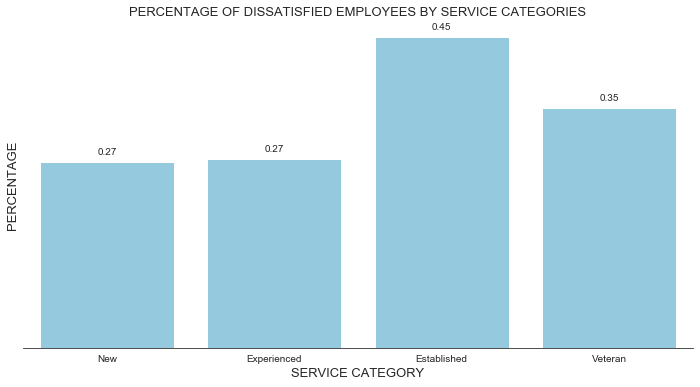

In [52]:
combined_pv = combined_updated_copy.pivot_table(index = "service_cat", values= "dissatisfied")
# Reorder the service categories
service_cat_order = ["New", "Experienced", "Established", "Veteran"]
combined_pv = combined_pv.reindex(service_cat_order)

#Reset the pivot table index
combined_pv.reset_index(inplace = True)

#Bar plot of pivot table
plt.figure(figsize=(12,6))
sns.set_style("white")

plt_serv = sns.barplot(x ="service_cat",
                       y = "dissatisfied",
                       data = combined_pv,
                      color = "skyblue"
                      )
#Improve plot aesthetics
plt.title("PERCENTAGE OF DISSATISFIED EMPLOYEES BY SERVICE CATEGORIES", fontsize = 13)
plt.xlabel("SERVICE CATEGORY", fontsize=13)
plt.ylabel("PERCENTAGE", fontsize = 13)
plt.yticks([])
#Remove spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)
        
#Function for plot annotation
def annotate(plot, rd = ".2f"):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), rd),
                      (p.get_x() + p.get_width()/2.,
                      p.get_height()), ha  = "center",
                      va = "center", xytext = (0,10),
                      textcoords = "offset points"
                     )
        
#Annotate the plot
annotate(plt_serv)
      


It is clear that employees with more than 7 years of service are more likely to resign due to some form of dissatifaction.

# JOB DISSATISFACTION IN TERMS OF GENERATION

Our second question is:

- Are younger employees resigning due to some kind of dissatifaction? What about older employees?

In order to answer this question we have to:

- Clean the age column.

- Split the data into generational groups

- Groupby the generational group and plot the results.

We will start off with analysing the age columns

In [53]:
combined_updated_copy.age.value_counts(dropna = False)

51-55            67
NaN              52
41-45            47
41  45           45
46  50           39
36-40            38
46-50            37
21  25           33
31  35           32
26  30           32
36  40           32
26-30            31
31-35            29
56 or older      29
21-25            27
56-60            19
61 or older      14
20 or younger    10
Name: age, dtype: int64

We will extract the digits from this data using the extract method.

In [54]:
#Extract digits
combined_updated_copy["age"] = combined_updated_copy["age"].str.extract(r"(\d+)").astype(float)

#Verify extraction
combined_updated_copy["age"].value_counts(dropna = False).sort_index()

20.0    10
21.0    60
26.0    63
31.0    61
36.0    70
41.0    92
46.0    76
51.0    67
56.0    48
61.0    14
NaN     52
Name: age, dtype: int64

We will try to categorise these values according to an article that explains categories of generation. We will group these values into the following categories

- Boomers - These cAtegories were born between 1944 and 1964. They're currently 56-76 years old

- Gen X - Gen X were born between 1965 and 1979 and  are currently between 41 - 55 years old

- Gen Y - Gen Y or Millenials were born between 1980 and 1994. They are currently between 26 - 40 years old

- Gen Z - Gen Z is the newest generation to be named and were born between 1995 and 2015. They are currently betwe 5 - 25 years old.

In [56]:
def age_cats(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 25:
        return "Gen Z"
    elif age >=26 and age <=40:
        return "Millenials"
    elif age >=41 and age<=55:
        return "Gen X"
    elif age >=56 and age <= 76:
        return "Baby Boomers"

#Apply the fucntion to the age column
combined_updated_copy["age_cat"] = combined_updated_copy["age"].apply(age_cats)
#Check if data is correct
combined_updated_copy["age_cat"].value_counts(dropna = False)


Gen X           235
Millenials      194
Gen Z            70
Baby Boomers     62
NaN              52
Name: age_cat, dtype: int64

In [57]:
#Explore dataframe
combined_updated_copy

,age,dissatisfied,employment_status,gender,id,institute,separationtype,institute_service,service_cat,age_cat
0,36.0,False,Permanent Full-time,Female,4.000000e+00,DETE,Resignation-Other reasons,7.0,Established,Millenials
1,41.0,True,Permanent Full-time,Female,6.000000e+00,DETE,Resignation-Other reasons,18.0,Veteran,Gen X
2,31.0,False,Permanent Full-time,Female,9.000000e+00,DETE,Resignation-Other reasons,3.0,Experienced,Millenials
3,46.0,True,Permanent Part-time,Female,1.000000e+01,DETE,Resignation-Other employer,NaN,Unknown,Gen X
4,31.0,False,Permanent Full-time,Male,1.200000e+01,DETE,Resignation-Move overseas/interstate,NaN,Unknown,Millenials
...,...,...,...,...,...,...,...,...,...,...
608,21.0,False,Temporary Full-time,Male,6.350660e+17,TAFE,Resignation,5.0,Experienced,Gen Z
609,51.0,False,Temporary Full-time,Male,6.350668e+17,TAFE,Resignation,1.0,New,Gen X
610,NaN,False,NaN,NaN,6.350677e+17,TAFE,Resignation,NaN,Unknown,NaN
611,51.0,False,Permanent Full-time,Female,6.350704e+17,TAFE,Resignation,5.0,Experienced,Gen X


Now, we will aggregate the data in dissatisfied column and age column using the pivot table

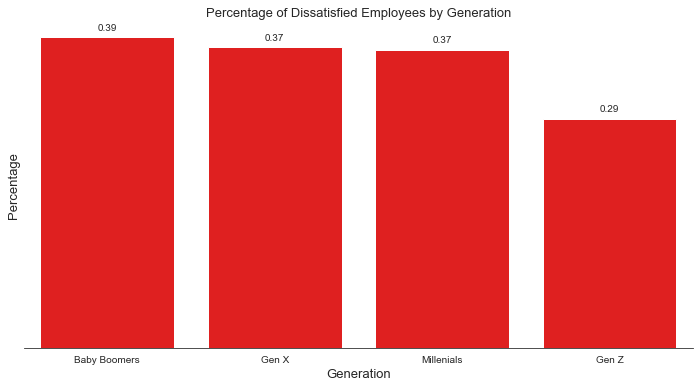

In [58]:
#Pivot table
combined_age = combined_updated_copy.pivot_table(values = "dissatisfied",
                                                index = "age_cat")

#Reorder the age index
age_order = ["Baby Boomers", "Gen X", "Millenials", "Gen Z"]
combined_age = combined_age.reindex(age_order)

#Reset the pivot table index
combined_age.reset_index(inplace =True)

#Bar plot of the pivot table
plt.figure(figsize = (12,6))
sns.set_style("white")

plt_age = sns.barplot(x = "age_cat",
                     y = "dissatisfied",
                     data = combined_age,
                      color = "red"
                     )
#Improve plot aesthetics
plt.title("Percentage of Dissatisfied Employees by Generation", fontsize = 13)
plt.xlabel("Generation", fontsize = 13)
plt.ylabel("Percentage", fontsize = 13)
plt.yticks([])

#Remove spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)
    
#Annotate the plot
annotate(plt_age)

From the visualization, we can deduce that Gen Z (employees within the ages of 20-25) are the most satisfied sect of employees. While Baby Boomers are the least satisfied sect. All some errors may be present, this may occur due to bias due sampling.

# COMPARE DISSATISFACTION BY SERVICE CATEGORY AND AGE.

Nnow, we will combine the data from service categories and age to see if there is any interesting observation. Although, so bias may occur as it is unlikely that The Gen Z category will fall under Extabished or Veterab sevice categories.

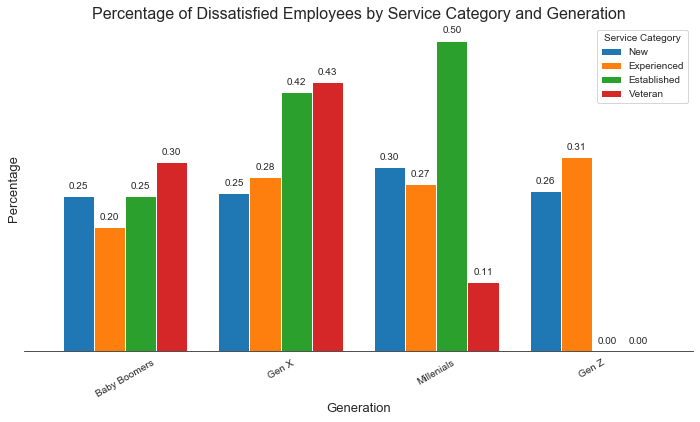

In [59]:
pv_dis_serv_age = combined_updated_copy.pivot_table(values = "dissatisfied",
                                                   index = "age_cat",
                                                   columns = "service_cat",#Grouper
                                                   fill_value = 0)#Fill missing values with 0

#Reindex
pv_dis_serv_age = pv_dis_serv_age.reindex(age_order)

#Reorder columns
pv_dis_serv_age = pv_dis_serv_age[service_cat_order]

#Bar plot of pivot table
#plt.figure(figsize = (12,6))
#sns.set_style("white")

plt_serv_age = pv_dis_serv_age.plot(kind = "bar",
                                    figsize = (12,6),
                                   rot = 30,
                                   width = 0.8)
#Improve plot aesthetics
plt.title("Percentage of Dissatisfied Employees by Service Category and Generation", fontsize = 16)
plt.xlabel("Generation", fontsize  =13)
plt.ylabel("Percentage", fontsize = 13)
plt.yticks([])
plt.legend(title = "Service Category", fontsize ="medium")

#Remove soines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)
    
#Annotate plot
annotate(plt_serv_age)

It is clear that most veterans from Baby Boomers and Gen X are less satisfied with their work enhance the reason for resignations, whereas the opposite is the case for Millenials. 

As expected, the Gen Z category has no values for Estabished and Veterans, since people of this age category haven't worked to that level.

# CONCLUSIONS

Thus far, we have analyzed two exit surveys done by Departmwent of Education, Training and Employment(DETE) and the Technical and Further Education (TAFE) institure in Queensland Australia.

We answered a couple of questions:

- Are employee who worked for the institute for a short poeriod of time resigning due to some kind of dissatisfaction? What about employees who havebeen there longer?

-  Are younger employees resignng due to some kind of dissatifaction? What about older employees.

From the analysis, we now know that most experienced employees are resigning due to some form of dissatisfaction. Acco0rding to the way our age group was categorised, Baby Boomers alongside a small group from Gen X are less satisfied with their job.

At the end we grouped both service categoriesa and age cateries to obtain a more detailed analysis. We observed that most people that are less satisfied with their work from the Baby Boomers age category are the Veteran, same applies to the Gen X category. This observation further solidifies our initial observations.

In a more comprehendable format, the following observations were made from the anlysis:
New employees are generally more satisfied with their jobs than more experienced employees

Baby Boomers Veterans are more satisfied with their jobs than Veterans from Gen X. This might be due to the fact that they don't have a choice as age is no longer a friend.